In [4]:
# ライブラリのインポート
import sys
sys.path.append("../utils")
import numpy as np
from control import matlab
from matplotlib import pyplot as plt

from calc_trapezoid_prof import make_vel_prof
from integral_calculus import integral_calculus

## 台形プロファイルが作れているか確認．

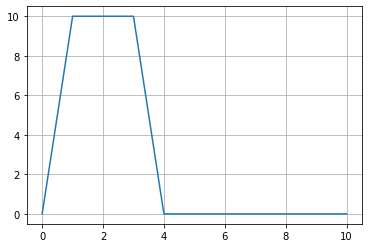

In [5]:
def test1():
    _time = 10.  # [s]
    _acc = 10.  # [m/s**2]
    _vel = 10.  # [m/s]
    _x = 30.  # [m]

    t = np.linspace(0, _time, 1000)
    u = make_vel_prof(t, distance=_x, vel=_vel, acc_max=_acc)

    plt.plot(t, u)
    plt.grid()
    plt.show()

test1()

## マス・ばね・ダンパ系のステップ応答とPID制御

G = 
   s + 5
-----------
s^2 + s + 5

C = 
30 s + 10
---------
    s

G*C = 
30 s^2 + 160 s + 50
-------------------
  s^3 + s^2 + 5 s

G_new = 
   30 s^2 + 160 s + 50
-------------------------
s^3 + 31 s^2 + 165 s + 50



/Users/takagiyugo/.pyenv/versions/anaconda3-2020.11/lib/python3.7/site-packages/control/timeresp.py:936: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


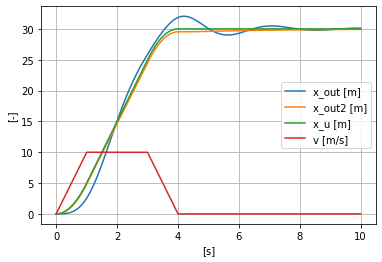

In [6]:
def test2():
    dt = 1e-3  # [s]
    _time = 10.  # [s]

    m = 1.  # [kg] 質量
    c = 1.  # [N*s/m] 減衰定数
    k = 5.  # [N/mm] ばね定数

    num = [c, k]
    den = [m, c, k]
    G = matlab.tf(num, den)

    Kp = 30.
    Ki = 10.0
    Kd = 0.
    C = matlab.tf([Kd, Kp, Ki], [1, 0])
    G_new = matlab.feedback(sys1=G * C, sys2=1, sign=-1)

    print(f'G = {G}')
    print(f'C = {C}')
    print(f'G*C = {G * C}')
    print(f'G_new = {G_new}')

    # ステップ応答
    # t = np.arange(0, _time, dt)
    # (y_out, t) = matlab.step(sys=G, T=t)
    # (y_out2, t2) = matlab.step(sys=G_new, T=t)

    # 任意の入力
    _acc = 10.  # [m/s**2]
    _vel = 10.  # [m/s]
    _x = 30.  # [m]

    t = np.arange(0, _time, dt)
    v = make_vel_prof(t, distance=_x, vel=_vel, acc_max=_acc)
    u = integral_calculus(v, dt)
    (y_out, t, x_out) = matlab.lsim(sys=G, U=u, T=t, X0=0)
    (y_out2, t2, x_out2) = matlab.lsim(sys=G_new, U=u, T=t, X0=0)

    plt.plot(t, y_out, label='x_out [m]')
    plt.plot(t, y_out2, label='x_out2 [m]')
    plt.plot(t, u, label='x_u [m]')
    plt.plot(t, v, label='v [m/s]')
    plt.xlabel('[s]')
    plt.ylabel('[-]')
    plt.legend()
    plt.grid()
    plt.show()

test2()